In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


In [46]:
df = pd.read_csv("Life Expectancy Data.csv")
display(df.head())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [23]:
df.columns = df.columns.str.strip()
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
df = df.dropna()
print("\nMissing values:\n", df.isnull().sum())




Shape of dataset: (2938, 22)

Column names:
 ['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

Data Types:
 Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  

In [24]:
print("\nSummary Statistics:\n")
display(df.describe())



Summary Statistics:



,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [25]:
print("\nUnique Countries:", df['Country'].nunique())
print("Year range:", df['Year'].min(), "to", df['Year'].max())


Unique Countries: 133
Year range: 2000 to 2015


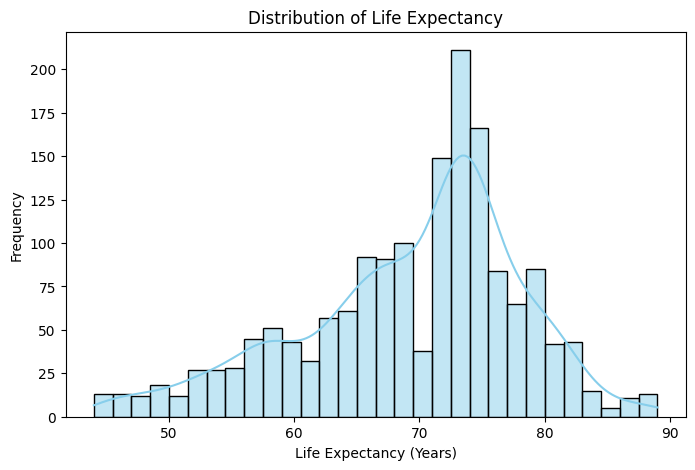

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['Life expectancy'], kde=True, bins=30, color='skyblue')

plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.show()

📊 Skewed Columns:
Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Measles', 'under-five deaths', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years'],
      dtype='object')


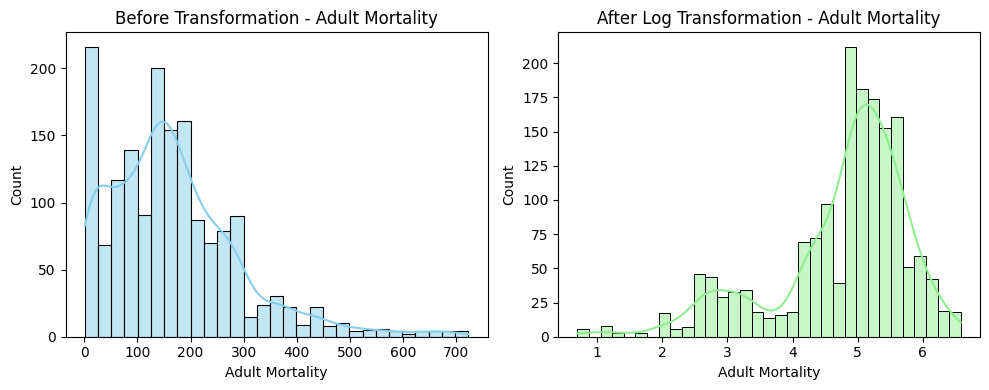

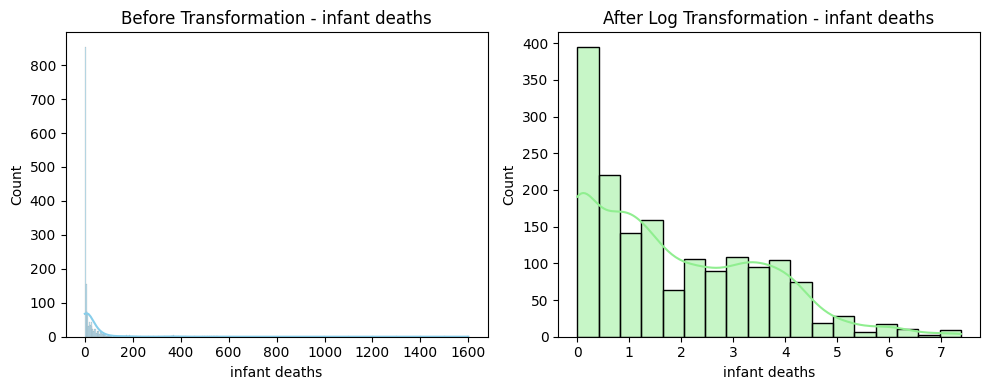

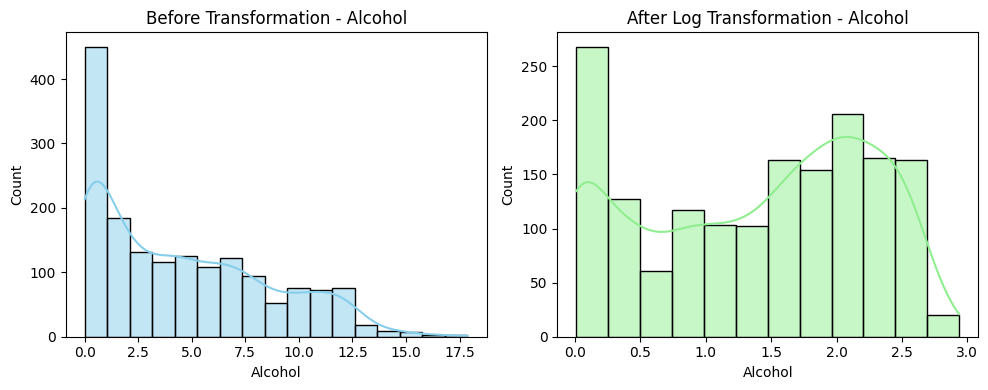

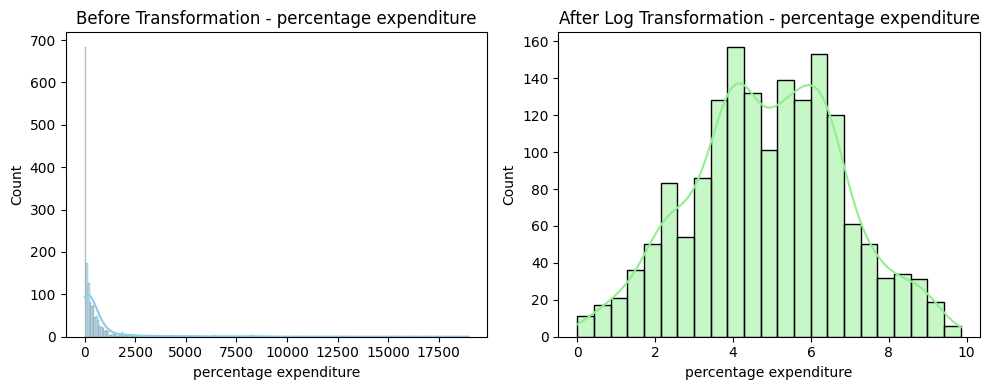

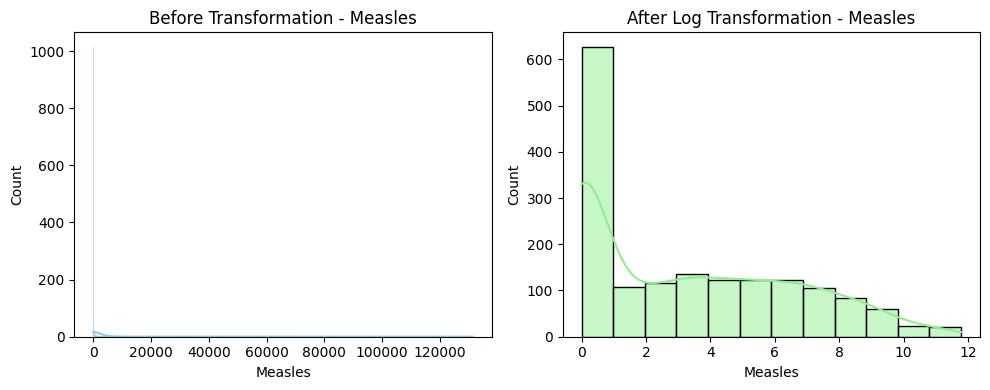

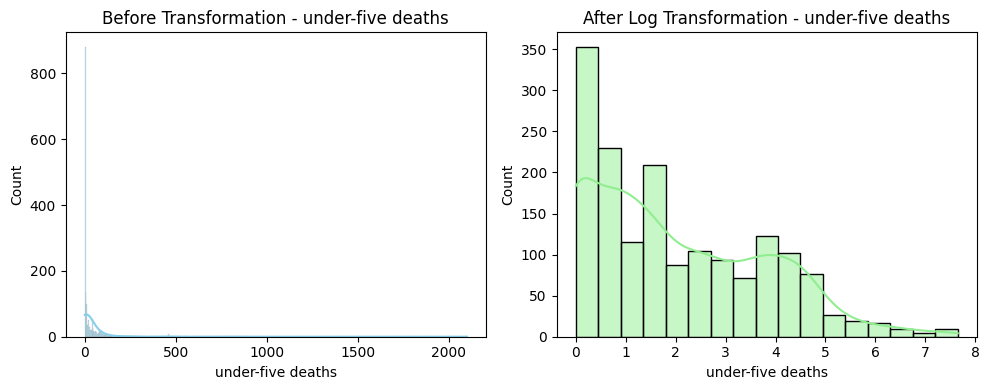

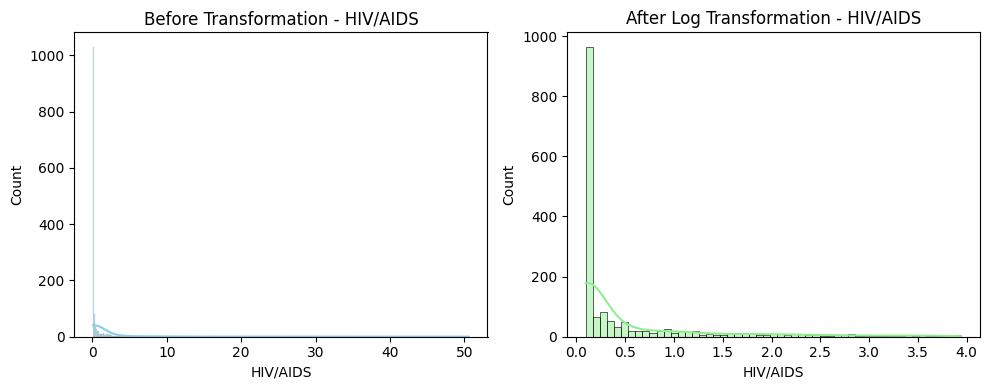

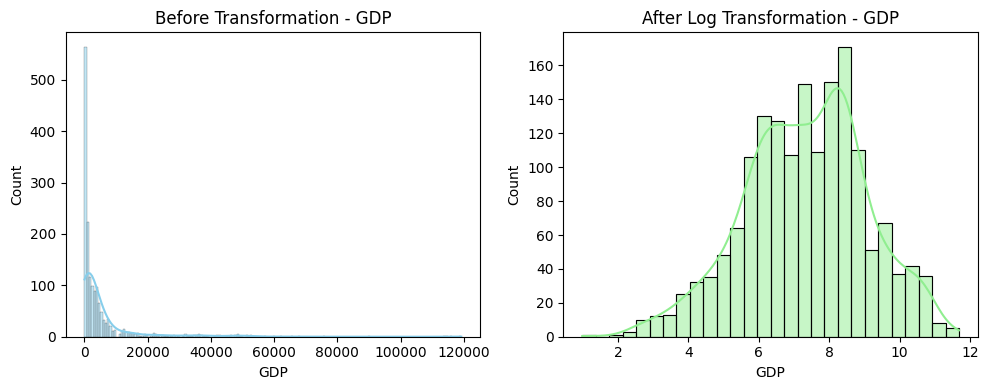

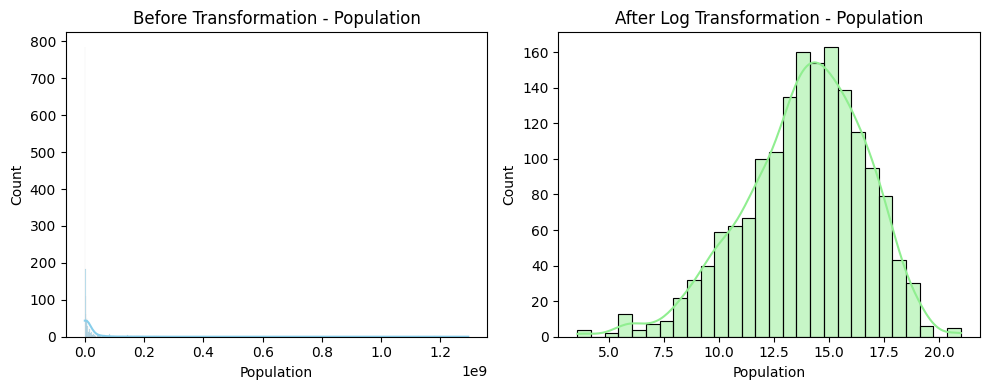

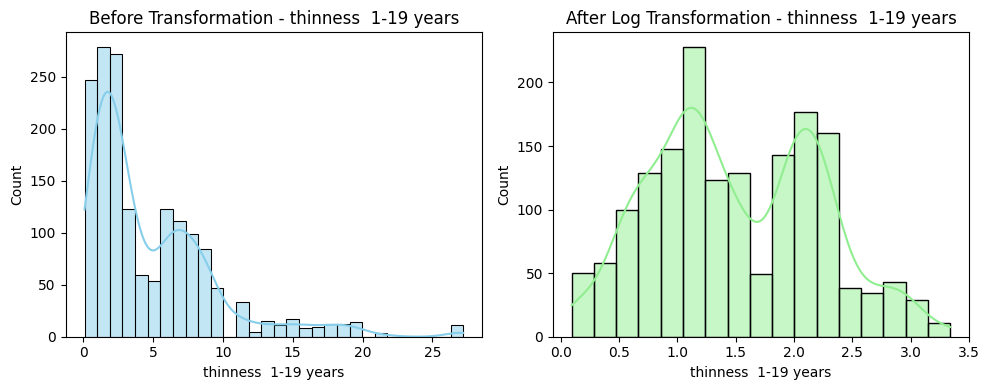

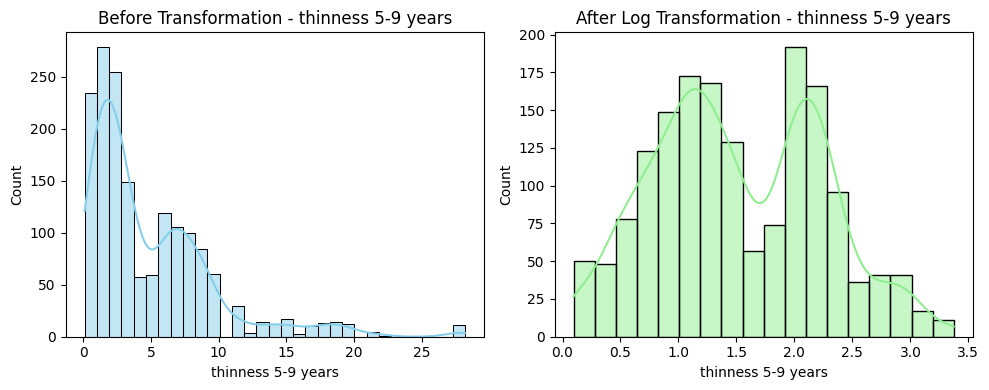

In [27]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute skewness for numeric features
skewness_values = df[numeric_cols].apply(lambda x: skew(x.dropna()))
skewed_cols = skewness_values[skewness_values > 0.5].index  # consider only right-skewed columns

print("📊 Skewed Columns:")
print(skewed_cols)

# Plot before vs after for each skewed column
for col in skewed_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Before Transformation - {col}")

    # Apply log transformation
    transformed = np.log1p(df[col])
    sns.histplot(transformed, kde=True, ax=axes[1], color='lightgreen')
    axes[1].set_title(f"After Log Transformation - {col}")

    plt.tight_layout()
    plt.show()




In [28]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Function to remove outliers using IQR
def remove_outliers_iqr(data, cols):
    df_out = data.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Count how many outliers before removing
        outliers = ((df_out[col] < lower) | (df_out[col] > upper)).sum()
        print(f"{col}: {outliers} outliers removed")

        # Keep only values within bounds
        df_out = df_out[(df_out[col] >= lower) & (df_out[col] <= upper)]
    
    return df_out

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df, numeric_cols)

print("\n✅ Shape before removing outliers:", df.shape)
print("✅ Shape after removing outliers:", df_cleaned.shape)

Year: 0 outliers removed
Life expectancy: 39 outliers removed
Adult Mortality: 34 outliers removed
infant deaths: 201 outliers removed
Alcohol: 0 outliers removed
percentage expenditure: 171 outliers removed
Hepatitis B: 135 outliers removed
Measles: 200 outliers removed
BMI: 0 outliers removed
under-five deaths: 103 outliers removed
Polio: 54 outliers removed
Total expenditure: 10 outliers removed
Diphtheria: 25 outliers removed
HIV/AIDS: 88 outliers removed
GDP: 30 outliers removed
Population: 55 outliers removed
thinness  1-19 years: 51 outliers removed
thinness 5-9 years: 27 outliers removed
Income composition of resources: 25 outliers removed
Schooling: 6 outliers removed

✅ Shape before removing outliers: (1649, 22)
✅ Shape after removing outliers: (395, 22)


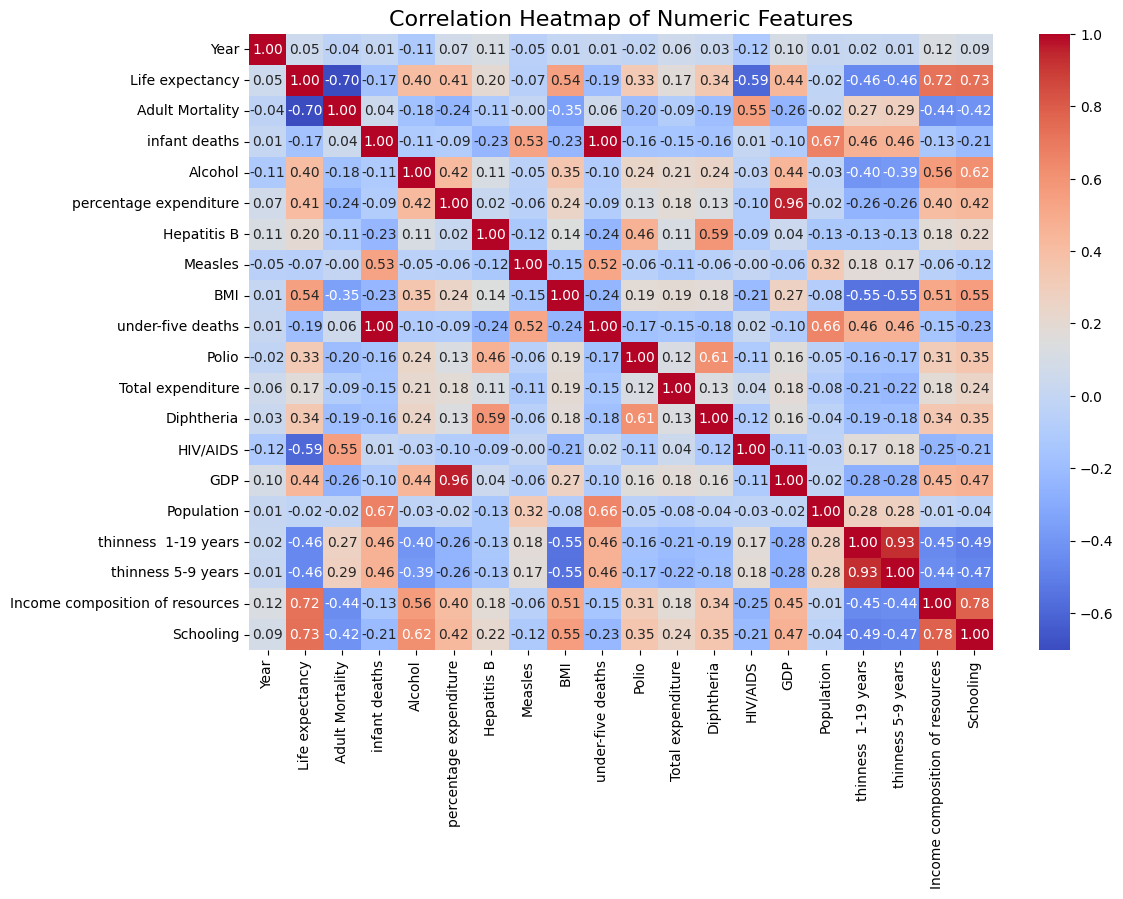

In [29]:
# Compute correlation (only numeric columns)
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np
import joblib

In [44]:

# Drop columns with too many nulls (optional threshold)
threshold = 0.5  # Drop columns with >50% missing
df_clean = df.loc[:, df.isnull().mean() < threshold]

# Fill remaining missing values
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

print("✅ Missing values handled. Clean data shape:", df_clean.shape)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

df_model = df_clean.copy()

# Encode all categorical columns
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col].astype(str))

# Copy dataframe
df_encoded = df_clean.copy()

# Encode categorical columns
le_country = LabelEncoder()
le_status = LabelEncoder()

df_encoded['Country'] = le_country.fit_transform(df_encoded['Country'])
df_encoded['Status'] = le_status.fit_transform(df_encoded['Status'])

# Save encoders for Streamlit app
joblib.dump(le_country, 'country_encoder.pkl')
joblib.dump(le_status, 'status_encoder.pkl')


✅ Missing values handled. Clean data shape: (1649, 22)


['status_encoder.pkl']

In [32]:
X = df_model.drop(['Life expectancy'], axis=1)
y = df_model['Life expectancy']


In [33]:
print("✅ Features and target separated successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Features and target separated successfully!
X shape: (1649, 21)
y shape: (1649,)


In [34]:
# 3️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# 4️⃣ Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [36]:
# 5️⃣ Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, mae, rmse))
    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")



Linear Regression
R² Score: 0.8166
MAE: 2.7509
RMSE: 3.6090

Random Forest
R² Score: 0.9499
MAE: 1.1128
RMSE: 1.8857

Gradient Boosting
R² Score: 0.9349
MAE: 1.4663
RMSE: 2.1500


In [37]:
results_df = pd.DataFrame(results, columns=['Model', 'R2_Score', 'MAE', 'RMSE']).sort_values(by='R2_Score', ascending=False)
display(results_df)


,Model,R2_Score,MAE,RMSE
1,Random Forest,0.949935,1.112797,1.885666
2,Gradient Boosting,0.934915,1.466284,2.150005
0,Linear Regression,0.816611,2.750866,3.608980


In [38]:

# 7️⃣ Identify best model
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model_name}")



🏆 Best Model: Random Forest


In [39]:
#8️⃣ Save the best model
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.pkl')
print("✅ Model saved as best_model.pkl")


✅ Model saved as best_model.pkl


In [43]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, "best_model.pkl")
print("✅ Model and columns saved successfully!")

import joblib

# ✅ Save model
joblib.dump(best_model, 'best_model.pkl')

# ✅ Save model columns (very important for Streamlit app)
joblib.dump(list(X_train.columns), 'model_columns.pkl')

print("✅ Model and column names saved successfully!")


✅ Model and columns saved successfully!
✅ Model and column names saved successfully!


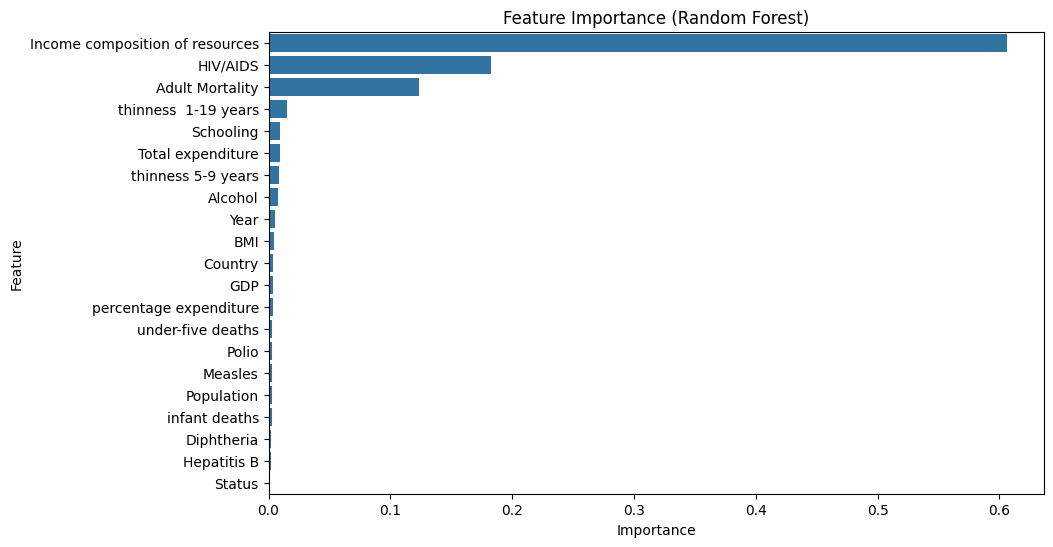

In [41]:
# 9️⃣ Plot feature importance for tree models
if best_model_name in ["Random Forest", "Gradient Boosting"]:
    feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.title(f"Feature Importance ({best_model_name})")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()